In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
loan_dataset=pd.read_csv(r"C:\Users\Shivit\Desktop\adv_proj\data.csv")

In [3]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [5]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [6]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [9]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

D:\anaconda\lib\site-packages\pandas\core\generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [11]:
# printing the first 5 rows of the dataframe
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [12]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [14]:
# dependent values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

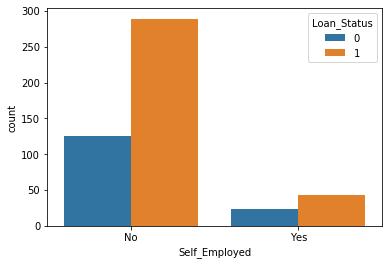

In [15]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

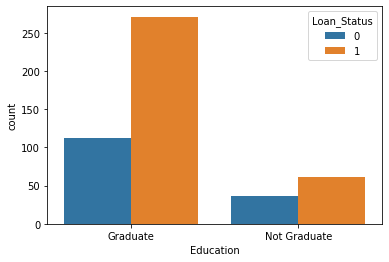

In [16]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

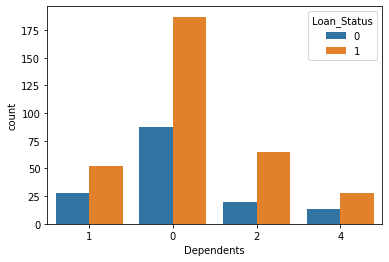

In [17]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_dataset)

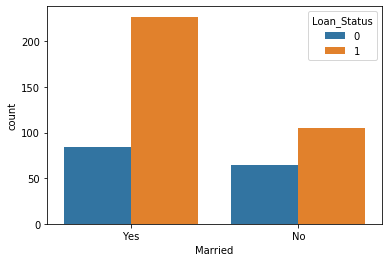

In [18]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [74]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [75]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [78]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y


In [ ]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [32]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [33]:
scaler = StandardScaler()



In [34]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
standardized_data = scaler.transform(X)

In [36]:
X = standardized_data
Y = loan_dataset['Loan_Status']

In [37]:
#Train Test Split

In [38]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [40]:
classifier = svm.SVC(kernel='linear')

In [41]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [43]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8055555555555556


In [44]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [45]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


In [110]:
input_data = (1,1,0,1,1,6000,6000,1000,360,1,0)


input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
prediction = classifier.predict(std_data)
print(prediction)


[1]


In [48]:
X_train

array([[-2.14041943, -1.35655324, -0.70475462, ...,  0.27554157,
        -2.42015348, -0.02954695],
       [ 0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694, -0.02954695],
       [ 0.46719815,  0.73716237,  0.92945899, ..., -2.48754937,
         0.41319694,  1.25977445],
       ...,
       [ 0.46719815, -1.35655324, -0.70475462, ...,  0.27554157,
         0.41319694,  1.25977445],
       [-2.14041943, -1.35655324, -0.70475462, ..., -0.64548874,
         0.41319694, -0.02954695],
       [ 0.46719815,  0.73716237,  2.56367259, ...,  0.27554157,
         0.41319694, -1.31886834]])

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)

In [80]:
pca_2d

array([[-1.18130684e+00,  1.35239460e+00],
       [ 3.19800991e-01, -2.02840498e-01],
       [ 1.47110723e+00, -1.06750763e+00],
       [-1.13911601e-01, -3.90366137e-01],
       [-9.54397075e-02, -5.59747452e-01],
       [-2.42469540e+00,  1.54854878e+00],
       [-2.50690986e+00,  1.03429560e+00],
       [-1.52288271e+00,  2.18624549e+00],
       [-1.10679185e+00, -1.19821792e+00],
       [-2.79948609e-01, -4.07547688e-01],
       [-1.12712788e-01, -2.90534322e-01],
       [-7.29032802e-02,  1.06012539e-01],
       [-1.42720227e+00,  2.57980041e+00],
       [ 9.75358362e-01,  5.24337798e-01],
       [-2.53817985e-01, -4.67993989e-01],
       [-1.26422362e-01, -3.83129138e-01],
       [ 3.68010533e-01, -1.01859417e+00],
       [ 2.19841986e-01, -1.23058450e+00],
       [-2.64314993e+00,  1.11674889e+00],
       [ 8.78280587e-02,  3.00373533e+00],
       [-9.76992228e-01,  5.70695218e-01],
       [ 8.94690198e-02, -1.58623957e-01],
       [ 1.67949851e+00,  2.17866502e+00],
       [ 3.

NameError: name 'c3' is not defined

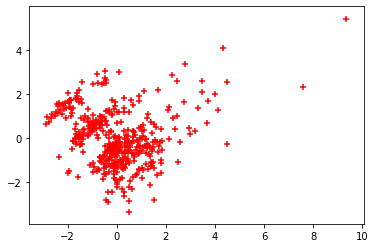

In [107]:
'''import pylab as pl
for i in range(0, pca_2d.shape[0]):
    
    if X_train[i].all() <= 10:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
    elif X_train[i].all() == 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='o')
    elif X_train[i].all() == 1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='*')
pl.legend([c1, c2, c3], ['Married', 'Dependents',"Education"])
pl.title('Loan_Eligibility')
pl.show()''''''

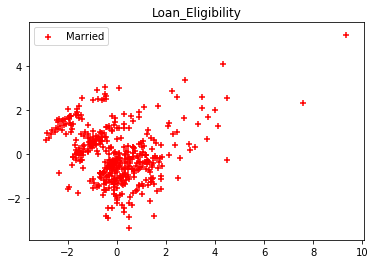

In [108]:
'''import pylab as pl
for i in range(0, pca_2d.shape[0]):
    
    if X_train[i].all() <= 10:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
    elif X_train[i].all() == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='o')
    elif X_train[i].all() == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='*')
pl.legend([c1], ['Married'])
pl.title('Loan_Eligibility')
pl.show()'''